<a href="https://colab.research.google.com/github/aanchitnayak/comparison_univariate_regressors/blob/master/A_Comprehensive_Comparison_of_Univariate_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A Comprehensive Comparison of Univariate Regression Models**

This notebook is focused on running three different regression models each of which will try to fit a curve on a given dataset. The dataset is the _auto_ dataset from *Introduction to Statistical Learning with Applications in R*. The notebook will compare the models and comprehensive analysis will be done for each model.

The investigation requires the user to establish a the relationship for the feature _Horsepower_ to the response variable _MPG_ (Mileage per Gallon). Hence, we need to find $f$ such that: 
$$ f: \mathbb{R} \rightarrow \mathbb{R}  $$

I propose three different models which will be used for interpretation for the above definition. They are: 
1. Linear Regression
2. Linear Regression with Square Root Basis Transformation
3. Polynomial Regression (with a degree 2)
4. Support Vector Regression (with an RBF Kernel)
5. Support Vector Regression with Basis Transformed Space and Linear Kernel


##**Importing Libraries, Data and Defining Variables**

We will call the horsepower variable $X$ (the feature or predictor variable) and the MPG variable $Y$ (the response variable). The function $f$ will be learned such that 
$$f(X) + \epsilon = Y$$
$\epsilon$ represents the inherent error due to the non-deterministic nature of the sampling process. 
We want our estimate for $f$ to be as good as possible. The function estimated will be called $\hat{f}$. 

Note that for polynomial regression to run, the data needs to be sorted. We will also sort the data by the predictor variable and then run the further analysis.

In [0]:
#importing the relevant libraries and the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('auto.csv')
data = data.sort_values(by=['horsepower'])
x = data['horsepower']
y = data['mpg']
print(data.head())

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
19   26.0          4          97.0          46    1835          20.5    70   
101  26.0          4          97.0          46    1950          21.0    73   
324  43.4          4          90.0          48    2335          23.7    80   
323  44.3          4          90.0          48    2085          21.7    80   
242  43.1          4          90.0          48    1985          21.5    78   

     origin                             name  
19        2     volkswagen 1131 deluxe sedan  
101       2          volkswagen super beetle  
324       2               vw dasher (diesel)  
323       2             vw rabbit c (diesel)  
242       2  volkswagen rabbit custom diesel  


##**Scaling and Splitting Input Data and Variable Inspection**

The input vector $X$ will be normalised (ergo, scaled) so that the functional form (here linear, but later non-linear) does not get impacted by unusally large values of the predictor. We will also visualise the distributions of the predictor and the response. This will give us a glimpse into their behaviours.  

For convenince in coding, the pandas series objects (i.e., the vectors $X$ and $Y$) will be converted into numpy arrays. This makes work more streamlined. 

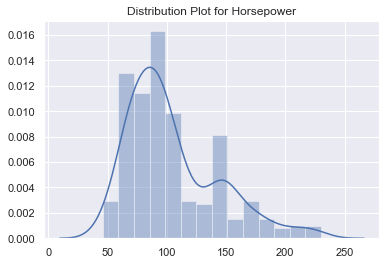

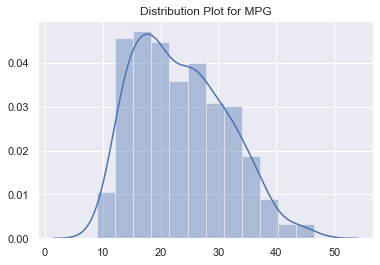

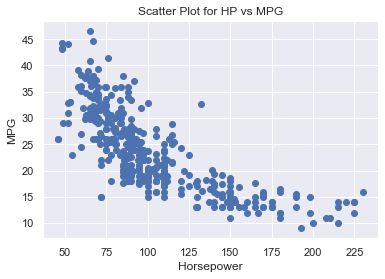

In [0]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

#Some Relevant Plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.distplot(x)
plt.title('Distribution Plot for Horsepower')
plt.show()

sns.distplot(y)
plt.title('Distribution Plot for MPG')
plt.show()

plt.scatter(x,y)
plt.title('Scatter Plot for HP vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Notice how the HP versus MPG scatter plot tells us that the relationship between them is non-linear. We will however use all three models and establish this better. 

In [0]:
#Performing the Train-Test Split
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2, random_state = 1)

##**Performing Linear Regression**

As is well known, we will have a linear model with an explicit equation $$\hat{f}(X) = \hat{\beta_1} X + \hat{\beta_0}$$

We will estimate $\hat{f}(X)$ such that 

$$\min_{\beta_0 , \beta_1} E[Y - \hat{f}(X)]^2$$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 08 May 2020   Prob (F-statistic):           7.03e-81
Time:                        21:50:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

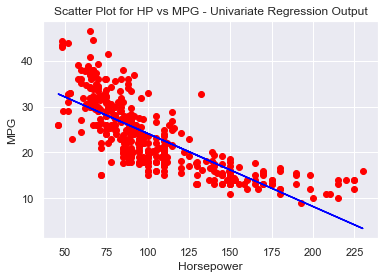

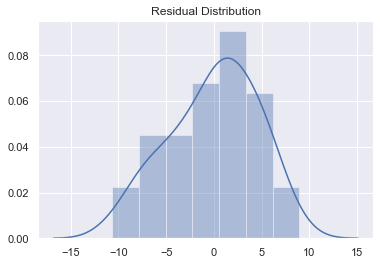

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_tr,y_tr)
#now, time to predict
y_h = regressor.predict(x_ts)
y_new = regressor.coef_*x_tr + regressor.intercept_
#for a convenient summary, we use Stats Models
import statsmodels.api as sm
x1= sm.add_constant(x)
est = sm.OLS(y, x1)
est2 = est.fit()
print(est2.summary())

plt.scatter(x,y,color = 'red')
plt.title('Scatter Plot for HP vs MPG - Univariate Regression Output')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot(x_tr,y_new,color='blue')
plt.show()
from sklearn.metrics import mean_squared_error
MSE_lin_tr = mean_squared_error(y_tr,y_new)
MSE_lin_ts = mean_squared_error(y_ts,y_h)

sns.distplot(y_h-y_ts)
plt.title('Residual Distribution')
plt.show()

As prescribed above, we use the scikit learn library to run a simple linear regression. However, to get a neat tabulated result for the regression task, we also use the Statsmodels library. The results include the p-value significance of the predictor (to the response), the goodness of fit $R^2$ value and the adjusted $R^2$ value for the same. The $r^2$ value obtained is 0.606 and adjusted $R^2$ is 0.605. The MSE is 29.0275. On finding the residuals, i.e., $r = \hat{y} - y_{test}$ and plotting a rough distribution, we see that it isn’t Gaussian. The implications of this will be discussed later. The p-value significance is 0, implying that HP is indeed strongly correlated to MPG. However, the dependence is not linear. To refine the results, we need to include some interaction term or perhaps use Polynomial Regression.

##**Basis Transformation in Simple Linear Regression - Square Root Transformation**

Before we go into Polynomial Regression, which is essentially another basis transformation to the above method, we can do some generalised work which will try to solve the problem by changing the above scale and transforming the space on which the regression is being defined. By visual inspection, it is quite certain that on taking a square root  transform of the response variable, we may end up with a better fitted line (and hence a better model). Hence the explicit functional form can be written down as:

$$\hat{f}(X) = \hat{\beta_0} + \hat{\beta_1}\sqrt{X}$$ 

We need to find $\hat{f}(X)$ which minimises the squared error loss given by $$\min_{\beta_0 , \beta_1} E[Y - \hat{f}(X)]^2$$

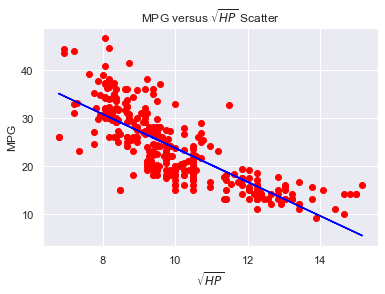

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     531.6
Date:                Fri, 08 May 2020   Prob (F-statistic):           2.77e-69
Time:                        21:50:47   Log-Likelihood:                -931.28
No. Observations:                 313   AIC:                             1867.
Df Residuals:                     311   BIC:                             1874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9866      1.561     37.780      0.0

Text(0.5, 1.0, 'Residual Distribution')

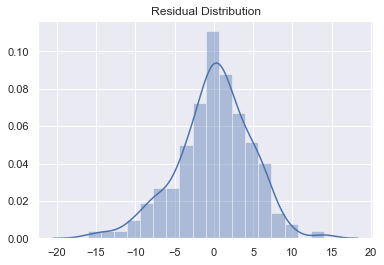

In [0]:
xnew = np.sqrt(x_tr)
xnew_test = np.sqrt(x_ts)

regressorsqrt = LinearRegression()
regressorsqrt.fit(xnew,y_tr)
#now, time to predict
y_new = regressorsqrt.coef_*xnew + regressorsqrt.intercept_
y_hat = regressorsqrt.coef_*xnew_test + regressorsqrt.intercept_

plt.scatter(xnew,y_tr,color = 'red')
plt.plot(xnew,y_new,color = 'blue')
plt.title('MPG versus $\sqrt{HP}$ Scatter')
plt.ylabel('MPG')
plt.xlabel('$\sqrt{HP}$')
plt.show()

x1= sm.add_constant(xnew)
est = sm.OLS(y_tr, x1)
est2 = est.fit()
print(est2.summary())

MSE_lin_sqrt_tr = mean_squared_error(y_tr,y_new)
MSE_lin_sqrt_ts = mean_squared_error(y_ts,y_hat)

sns.distplot(y_new - y_tr)
plt.title('Residual Distribution')

##**Performing Polynomial Regression**

Now, we are going to do a basis transform where $X \rightarrow X^2$. The explicit functional form is 
$$\hat{f}(X) = \hat{\beta_0} + \hat{\beta_1}X + \hat{\beta_2}X^2$$ 

Again we minimise the mean squared error and find the optima. 

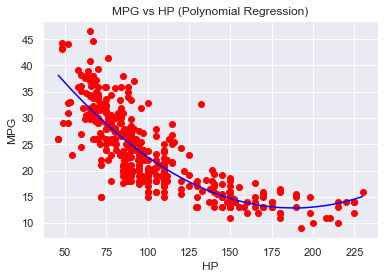

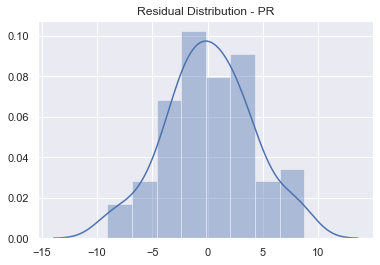

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     319.7
Date:                Fri, 08 May 2020   Prob (F-statistic):           4.47e-76
Time:                        21:50:47   Log-Likelihood:                -912.09
No. Observations:                 313   AIC:                             1830.
Df Residuals:                     310   BIC:                             1841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1326      2.109     27.093      0.0

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_tr)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_tr)

y_h = lin_reg_2.predict(poly_reg.fit_transform(x_ts))
r_ts = y_h - y_ts

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('MPG vs HP (Polynomial Regression)')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()
sns.distplot(r_ts)
plt.title('Residual Distribution - PR')
plt.show()
from sklearn.metrics import mean_squared_error
MSE_poly_tr = mean_squared_error(y_tr,lin_reg_2.predict(poly_reg.fit_transform(x_tr)))
MSE_poly_ts = mean_squared_error(y_ts,lin_reg_2.predict(poly_reg.fit_transform(x_ts)))

import statsmodels.api as sm
#x1= sm.add_constant(x_poly)
est = sm.OLS(y_tr, x_poly)
est2 = est.fit()
print(est2.summary())

The polynomial regressor with a degree 2 allows us to establish a better model. The goodness of fit measure increases (although not very high). A fair question should follow: Why stop at degree 2? It is an interesting exercise to see that when we use a polynomial regressor with degree 3, the third degree interaction term's p-value significance is very high (~0.6) which implies that the higher degree term is not contributing in creating a meaningful output. 

Also, notice how the _Gaussianity_ of the residual distribution increases.

##**Performing Support Vector Regression**

It is necessary for the reader to note that the response vector is also being scaled for this model. This is done because there is no explicit functional form that we recieve as an output of this regressor. Support Vector Machines (and hence also the regressor) is not exactly as explicit as other linear models we see above. The objective function is formulated such that the misclassification error (for classification problems) or distances of points outside a set margin (for regression problems) is minimised subject to various constraints. In our investigation, the points outside a set margin will have distances $\zeta$ which will be minimised subject to constraints and slack variables. For the geeky ones, this algorithm uses convex optimisation. 

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


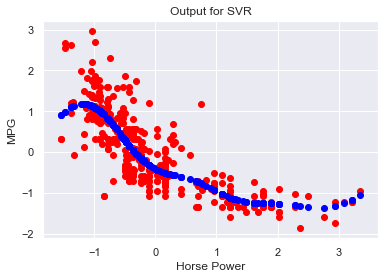

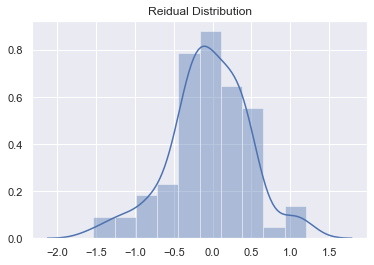

In [0]:
#This solution may require for us to scale the features (both response and the predictor) 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_sc_tr = sc_x.fit_transform(x_tr)
x_sc_ts = sc_x.fit_transform(x_ts)
y_sc_tr = sc_y.fit_transform(y_tr)
y_sc_ts = sc_y.fit_transform(y_ts)

#Support Vector Regression
from sklearn.svm import SVR
SVregressor = SVR(kernel='rbf')

SVregressor.fit(x_sc_tr,y_sc_tr)
y_h = (SVregressor.predict(x_sc_ts)).reshape(-1,1)
r_ts = y_h - y_sc_ts

MSE_svr_tr = mean_squared_error(y_sc_tr,(SVregressor.predict(x_sc_tr)))
MSE_svr_ts = mean_squared_error(y_sc_ts,(SVregressor.predict(x_sc_ts)))

plt.scatter(x_sc_tr, y_sc_tr, color = 'red')
plt.scatter(x_sc_tr, (SVregressor.predict(x_sc_tr)), color = 'blue')
plt.title('Output for SVR')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.show()
sns.distplot(r_ts)
plt.title('Reidual Distribution')
plt.show()

##**SVR with Square Root Basis Transformation**

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


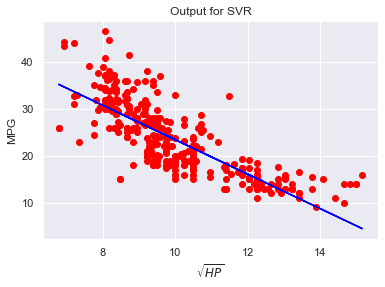

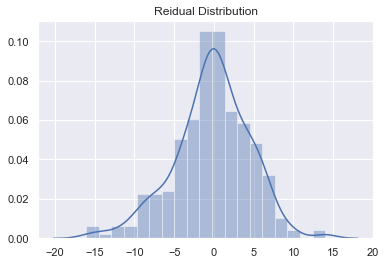

In [0]:
xnew = np.sqrt(x_tr)
xnew_test = np.sqrt(x_ts)

svr_sqrt_regressor = SVR(kernel='linear')
svr_sqrt_regressor.fit(xnew,y_tr)
y_h = (svr_sqrt_regressor.predict(xnew)).reshape(-1,1)
r_ts = y_h - y_tr
y_new = svr_sqrt_regressor.predict(xnew_test).reshape(-1,1)

MSE_svr_sqrt_tr = mean_squared_error(y_h,y_tr)
MSE_svr_sqrt_ts = mean_squared_error(y_new,y_ts)


plt.scatter(xnew, y_tr, color = 'red')
plt.plot(xnew, y_h, color = 'blue')
plt.title('Output for SVR')
plt.xlabel('$\sqrt{HP}$')
plt.ylabel('MPG')
plt.show()
sns.distplot(r_ts)
plt.title('Reidual Distribution')
plt.show()

##**Comparing The Models**

One of they key inferences out of this exercise is to judge the bias-vairance trade-off among algorithms. Notice the different MSEs for different variables. 

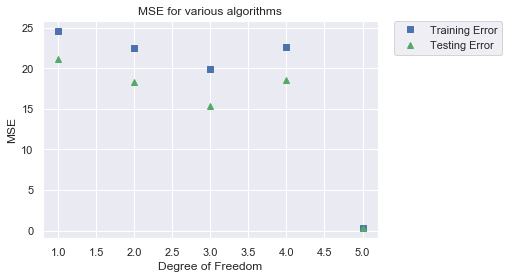

In [0]:
MSE_tr = [MSE_lin_tr, MSE_lin_sqrt_tr, MSE_poly_tr,MSE_svr_sqrt_tr, MSE_svr_tr]
#MSE_tr = (MSE_tr - np.mean(MSE_tr)) / np.std(MSE_tr)
MSE_ts = [MSE_lin_ts, MSE_lin_sqrt_ts, MSE_poly_ts, MSE_svr_sqrt_ts, MSE_svr_ts]
#MSE_ts = (MSE_ts -np.mean(MSE_ts)) / np.std(MSE_ts)
deg_freedom = [1,2,3,4,5]
plt.plot(deg_freedom, MSE_tr ,'bs',label = 'Training Error')
plt.plot(deg_freedom,MSE_ts,'g^', label = 'Testing Error')
plt.title('MSE for various algorithms')
plt.xlabel('Degree of Freedom')
plt.ylabel('MSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Notice the trends in errors. Usually, it is expected for the Testing error to be higher than the training error. But due to unequal sample sizes, we see an _almost_ uniform disparity among the two. Hence we can we will limit the error comparison only to larger trends and not necessarily among training and testing samples. Notice how the error is high for Linear Regression and it decreases steadily up to Polynomial Regression. For SVR, the error is higher. This can be owed to the fact that this algorithm has a high variance. To make it better, we use a basis transform that we did with Linear Regression and apply it with SVR. So we limit the high variance of SVR model by - 

1. Running a basis transformation such that $$X \rightarrow \sqrt{X}$$
2. Setting the kernel to _linear_ instead of _RBF_

As is visible from the graph, **the error monumentally decreases.**
Hence, the optimal regressor in this case is the **Support Vector Regressor with a Square Root Basis Transformation**. 